# Shopping Analysis
<a id="table_of_contents"></a>
### Table of contents

<ol>
  <li><a href="#data_preparation">Data preparation</a></li>
  <li><a href="#eda">Exploratory analysis with visualizations</a>
  <ul>
    <li><a href='#by_gender'>Among males and females, who spends the most?
    </a></li>
    <li> <a href='#by_gender_category'>What are the most commonly purchased product categories by females and males?
    </a></li>
    <li> <a href='#by_money_category'>What is the average amount of money spent in each product category?
    </a></li>
    <li> <a href='#lower_prices'>Are higher quantities associated with lower prices, or is there a different pattern observed?
    </a></li>
    <li> <a href='#shopping_behavior'>Are there any notable patterns or trends in the shopping behavior across different gender and age groups?
    </a></li>
    <li> <a href='#locations'>What are the preferred shopping locations?
    </a></li>
    <li> <a href='#locations_categories'>What are the top-selling product categories in different shopping locations?
    </a></li>
    <li> <a href='#payment_method'>What payment method is most commonly used by the customers?
    </a></li>
    <li> <a href='#day_of_week'>On which day of the week are the highest sales observed?
    </a></li>
    <li> <a href='#month'>On which month of the year are the highest sales observed?
    </a></li>
    </ul>
  </li>  
  <li><a href="#main_insights">Main insights</a>
</ol>


## Data preparation
<a id='data_preparation'></a>

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# show a glimpse of the dataset
df = pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
# check the dimensions of the dataset
df.shape

(99457, 10)

In [4]:
# check the structure and the data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [9]:
# look for duplicates
df.duplicated().any()

False

In [2]:
# create an age group column
def age_group (age):
    if age <= 25:
        return "young adult"
    elif age <= 45:
        return "adult"
    elif age <= 55:
        return "middle-age"
    else:
        return "old-age"

df['age_group'] = df['age'].apply(age_group)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,adult
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,young adult
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,young adult
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,old-age
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,middle-age


In [3]:
# create a total amount column
df["total_amount"] = df["quantity"] * df["price"]
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,total_amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,adult,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,young adult,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,young adult,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,old-age,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,middle-age,242.40


In [4]:
# change the invoice_date Dtype from object to datetime
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
invoice_date_dtype= df["invoice_date"].dtype
invoice_date_dtype

C:\Users\nilvi\AppData\Local\Temp\ipykernel_980\2149184930.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])


dtype('<M8[ns]')

In [5]:
# create year, month and day columns
df["year"] = df["invoice_date"].dt.year
df["month"] = df["invoice_date"].dt.month
df["day_of_week"] = df["invoice_date"].dt.dayofweek

day_mapping= {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

df["day_of_week"] = df["day_of_week"].map(day_mapping)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,total_amount,year,month,day_of_week
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,adult,7502.00,2022,5,Sunday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,young adult,5401.53,2021,12,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,young adult,300.08,2021,9,Saturday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,old-age,15004.25,2021,5,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,middle-age,242.40,2021,10,Sunday


In [6]:
# check the min and max values of each year
date_range_by_year = df.groupby('year')['invoice_date'].agg(['min', 'max'])

date_range_by_year

,min,max
year,,
2021,2021-01-01,2021-12-31
2022,2022-01-01,2022-12-31
2023,2023-01-01,2023-12-02


## Exploratory analysis with visualizations
<a id="eda"></a>

<a id="by_gender"></a>
#### Among males and females, who spends the most?
<a href="#table_of_contents">Navigate to contents</a>

Text(0, 0.5, 'Total amount spent')

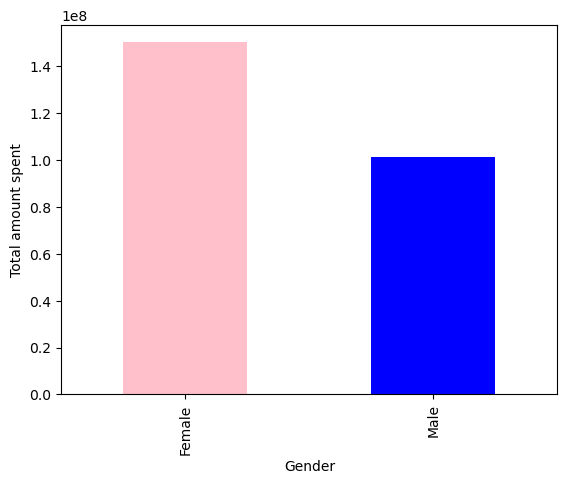

In [7]:

by_gender = df.loc[df["year"] != "2023"].groupby("gender")["total_amount"].sum()

by_gender.plot(kind="bar", color=["pink", "blue"])

plt.xlabel("Gender")
plt.ylabel("Total amount spent")


<a id="by_gender_category"></a>
#### What are the most commonly purchased product categories by females and males? 
<a href="#table_of_contents">Navigate to contents</a>

gender,Female,Male
category,,
Clothing,20652,13835
Cosmetics,9070,6027
Food & Beverage,8804,5972
Toys,6085,4002
Shoes,5967,4067
Souvenir,3017,1982
Technology,2981,2015
Books,2906,2075


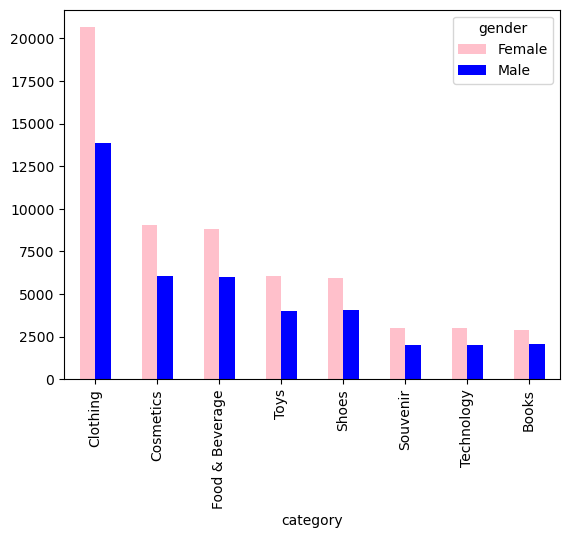

In [8]:
gender_shoping = df.loc[df["year"] != "2023"].groupby("gender")["category"].value_counts().unstack(level=0)

gender_shoping = gender_shoping.sort_values(by="Female", ascending=False)
gender_shoping.plot(kind="bar",color=["pink","blue"])

gender_shoping

<a id="by_money_category"></a>
#### What is the average amount of money spent in each product category?
<a href="#table_of_contents">Navigate to contents</a>

Text(0, 0.5, 'Category')

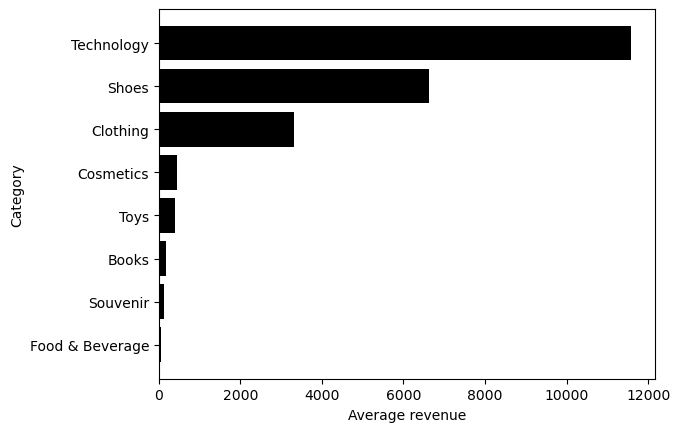

In [9]:
avg_revenue= df.loc[df["year"] != "2023"].groupby("category")["total_amount"].mean()
avg_revenue = avg_revenue.sort_values(ascending=True)

plt.barh(avg_revenue.index, avg_revenue, color="black")

plt.xlabel("Average revenue")
plt.ylabel("Category")

<a id="lower_prices"></a>
#### Are higher quantities associated with lower prices, or is there a different pattern observed?
<a href="#table_of_contents">Navigate to contents</a>

Text(0, 0.5, 'Quantity')

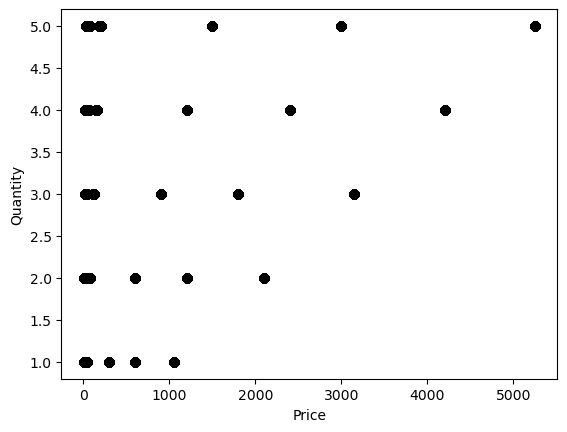

In [23]:
plt.scatter(df["price"], df["quantity"], color="black")

plt.xlabel("Price")
plt.ylabel("Quantity")

<a id="shopping_behavior"></a>
#### Are there any notable patterns or trends in the shopping behavior across different gender and age groups?
<a href="#table_of_contents">Navigate to contents</a>

gender,Female,Male
age_group,,
adult,23172,15323
middle-age,11334,7682
old-age,15894,10693
young adult,9082,6277


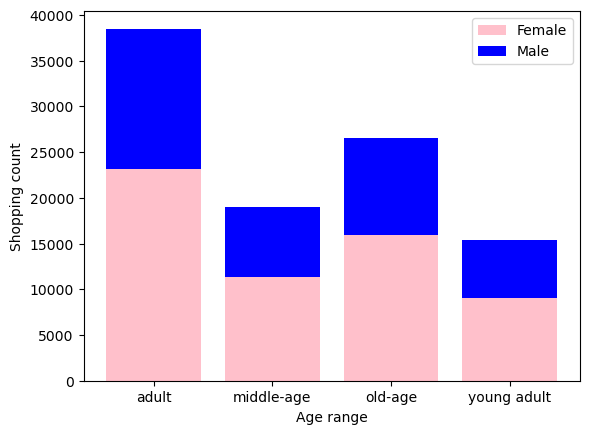

In [10]:
gender_count = df.loc[df["year"] != "2023"].groupby("age_group")["gender"].value_counts().sort_index(level="age_group").unstack()


plt.bar(gender_count.index,gender_count['Female'],label="Female",color="pink")
plt.bar(gender_count.index,gender_count['Male'],label="Male", color="blue", bottom=gender_count['Female'])
plt.xlabel("Age range")
plt.ylabel("Shopping count")
plt.legend()

gender_count

<a id="locations"></a>
#### What are the preferred shopping locations?
<a href="#table_of_contents">Navigate to contents</a>

Text(0, 0.5, 'Mall')

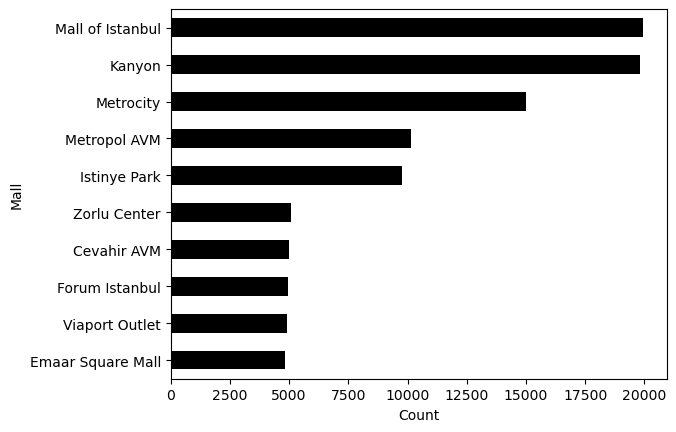

In [11]:
shopping_mall = df.loc[df["year"] != "2023"].groupby("shopping_mall").size().sort_values().plot.barh(color="black")
plt.xlabel("Count")
plt.ylabel("Mall")

<a id="locations_categories"></a> 
#### What are the top-selling product categories in different shopping locations?
<a href="#table_of_contents">Navigate to contents</a>

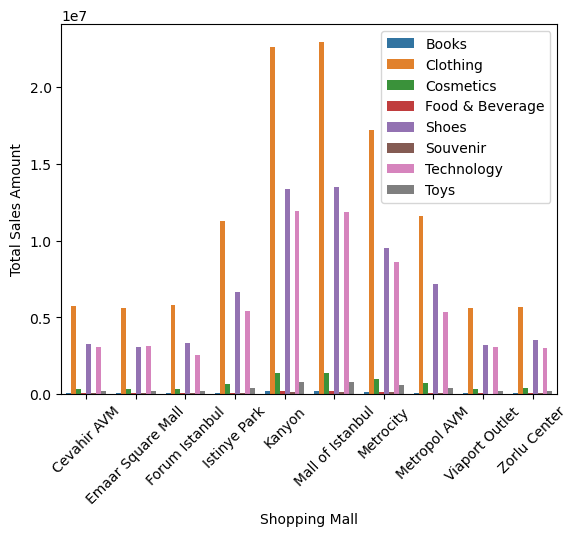

In [80]:
shopping_categories = df.loc[df["year"] != "2023"].groupby(["shopping_mall", "category"])["total_amount"].sum()

sns.barplot(data= shopping_categories.reset_index(), x="shopping_mall", y="total_amount", hue="category")
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(loc="best")


<a id="payment_method"></a>
#### What payment method is most commonly used by the customers?
<a href="#table_of_contents">Navigate to contents</a>

Text(0, 0.5, 'Count')

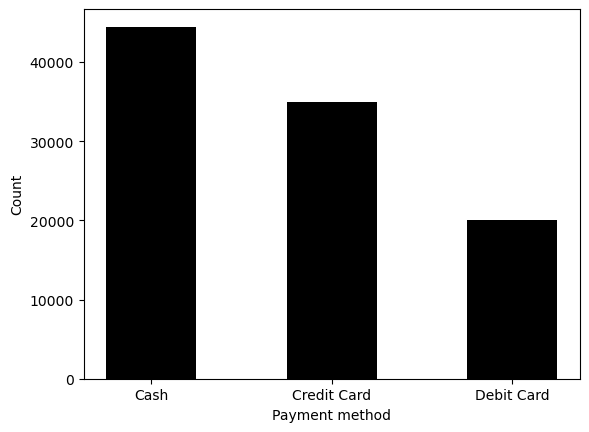

In [24]:
filtered_df = df[df["year"] != "2023"]
payment_method = filtered_df['payment_method'].value_counts()

plt.bar(payment_method.index, payment_method.values, color=["black"], width=0.5)
plt.xlabel("Payment method")
plt.ylabel("Count")

<a id="day_of_week"></a> 
#### On which day of the week are the highest sales observed?
<a href="#table_of_contents">Navigate to contents</a>

day_of_week
Friday       36461538.67
Monday       37578624.06
Saturday     36509126.88
Sunday       34130252.87
Thursday     35679669.44
Tuesday      35510654.19
Wednesday    35635928.14
Name: total_amount, dtype: float64

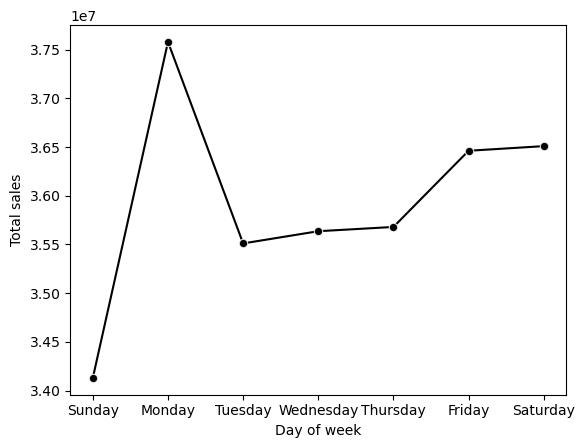

In [83]:
sales_by_day = df.loc[df["year"] != "2023"].groupby("day_of_week")["total_amount"].sum()

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

sales_data = pd.DataFrame({"Day of week": pd.Categorical(sales_by_day.index, categories=day_order ,ordered=True), 
                           "Total sales": sales_by_day.values})

colors = ["black"] 

sns.lineplot(data=sales_data, x="Day of week", y="Total sales", color=colors[0], marker='o')
sns.lineplot(data=sales_data, x="Day of week", y="Total sales", color=colors[0], linewidth=0, marker="o", fillstyle="full", alpha=0.3)
plt.xlabel("Day of week")
plt.ylabel("Total sales")

sales_by_day


<a id="month"></a> 
#### On which month of the year are the highest sales observed?
<a href="#table_of_contents">Navigate to contents</a>

month
January      25755677.45
February     23980067.68
March        20826196.84
April        20360575.14
May          20608277.98
June         20344057.02
July         20721536.72
August       19812561.97
September    19248108.83
October      21049007.84
November     18700196.96
December     20099529.82
Name: total_amount, dtype: float64

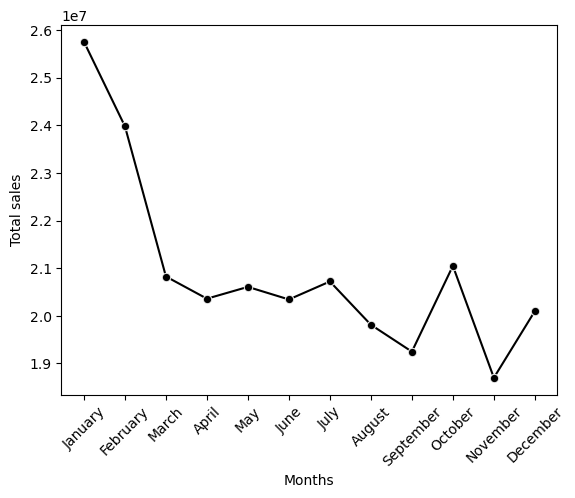

In [60]:
sales_by_month = df.loc[df["year"] != "2023"].groupby("month")["total_amount"].sum()

sales_by_month.index = sales_by_month.index.map(lambda x: calendar.month_name[x])

month_data = {"Month": sales_by_month.index, "Total sales": sales_by_month.values}

colors = ["black"] 

sns.lineplot(data= month_data, x="Month", y="Total sales", color=colors[0], marker='o')
sns.lineplot(data= month_data, x="Month", y="Total sales", color=colors[0], linewidth=0, marker="o", fillstyle="full", alpha=0.3)
plt.xlabel("Months")
plt.ylabel("Total sales")
plt.xticks(rotation=45)

sales_by_month


## Main insights
<a id='main_insights'></a>
* Females, particulary adult women, dominate spending
* Popular purchases: clothing, cosmetics, and food & beverages 
* Contrarily, technology generates the highest sales revenue, followed by shoes and clothing
* Top shopping destinations: Mall of Istanbul, Kanyon and Metrocity
* Cash payments are preferred
* Mondays witness the highest sales and January stands out as the peak sales month

<a href="#table_of_contents">Navigate to contents</a>

